In [1]:
from __future__ import division, print_function
%matplotlib inline
import matplotlib.pyplot as plt

import matplotlib
import numpy as np
import os
import pandas as pd
from notifyme import notifyme

In [2]:
from tf_unet import image_gen
from tf_unet import unet
from tf_unet import util
from tf_unet import image_util

In [3]:
nx = 640
ny = 360

In [9]:
net = unet.Unet(channels=3, n_class=3, layers=5, features_root=16, cost_kwargs=dict(class_weights=[1,1,1]))

2017-10-06 18:34:08,520 Layers 5, features 16, filter size 3x3, pool size: 2x2


## Generation of qualitative flow plots


In [41]:
data = net.predictAll(
    model_path="./unet_trained/v8_b4_ly5/model.cpkt", 
    images_path='F:/MOY_PhD_DATA_LOCAL/2017_watsen/data/frames',
    count=5000)

Number of files used: 18497
INFO:tensorflow:Restoring parameters from ./unet_trained/v8_b4_ly5/model.cpkt


2017-10-09 09:06:13,194 Restoring parameters from ./unet_trained/v8_b4_ly5/model.cpkt
2017-10-09 09:06:14,130 Model restored from file: ./unet_trained/v8_b4_ly5/model.cpkt
C:\Users\moydevma\AppData\Roaming\Python\Python35\site-packages\tf_unet-0.1.0-py3.5.egg\tf_unet\unet.py:329: RuntimeWarning: invalid value encountered in greater
  np.sum(prediction > 0.9, axis=(1, 2))/(prediction.shape[1]*prediction.shape[0])


In [42]:
import pandas as pd
dattt = pd.DataFrame({
    'time':data['time'] , 
    'sensor':data['sensor'] , 
    'p95':data['watsen']['0.8'],
    'p95':data['watsen']['0.9'],
    'p95':data['watsen']['0.95'],
    'p97':data['watsen']['0.97']
})
# dattt.to_csv("output.csv")


In [43]:
# Get training data for plotting
import glob
from datetime import datetime



training = {
    'time':[],
    'sensor':[]
}
for d in glob.glob('training_data/3_cl/*.tiff'):
    
    info = os.path.basename(d).split('_')
    time = datetime.strptime(info[0], '%y%m%d %H%M%S')
    if time > min(dattt['time']) and time < max(dattt['time']):
        training['time'].append(datetime.strptime(info[0], '%y%m%d %H%M%S'))
        training['sensor'].append(float(info[1].split('.')[0]) / 10)
        
    

## Plot with matplotlib


<function matplotlib.pyplot.show>

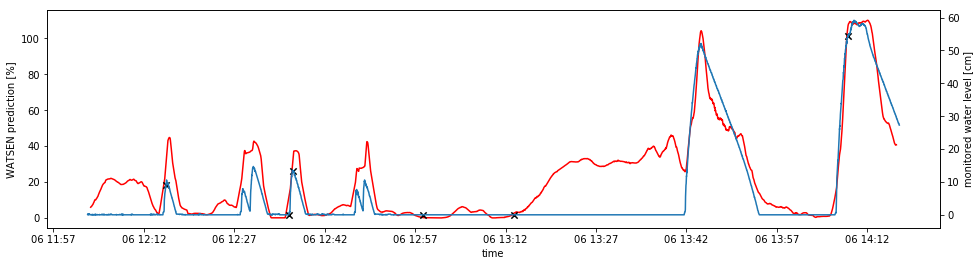

In [75]:
fig, ax1 = plt.subplots(figsize=(16, 4))
ax1.plot(dattt['time'], dattt['p95'].rolling(60, center=True).mean(), 'r')

ax2=ax1.twinx()
ax2.plot(dattt['time'], dattt['sensor'])
ax2.scatter(training['time'], training['sensor'], marker='x', s = 40, c='black')


ax1.set_xlabel('time')
ax1.set_ylabel('WATSEN prediction [%]')
ax2.set_ylabel('monitored water level [cm]')
plt.show

## Plot with Plotly

In [59]:
import plotly.plotly as py
import plotly.figure_factory as ff
from plotly.graph_objs import *
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)
import plotly
plotly.tools.set_credentials_file('matthew.moy', 'AU822nWnLGzDc5QcmQPS')






In [81]:

data=[{
    'x':dattt['time'], 
    'y':dattt['sensor'], 
    'mode': 'lines',
    'name': 'Ultrasound measurement'
    },{
    'x': dattt['time'],    
    'y': dattt['p95'].rolling(60, center=True).mean(),
    
    'mode': 'line',
    'name': 'WATSEN estimation',
    'yaxis': 'y2'
    },{
    'x': training['time'], 
    'y': training['sensor'],
    'mode': 'markers',
    'name': 'training data'
    }]

layout = Layout(
    title = 'WATSEN perfomance',
    yaxis = dict(title='Measured water level [cm]'),
    yaxis2 = dict(title='Estimated flooding [%]', overlaying='y', side='right'))

py.iplot(dict(data=data, layout=layout) )

In [ ]:
from notifyme import notifyme


notifyme(settingsfile='emailsettings.txt', message='It works!')
